In [1]:
import pandas as pd
import numpy as np



import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('new_train.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [3]:
# df.info()

### job

In [4]:
df['job'].value_counts()

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

In [5]:
df_job=pd.get_dummies(df['job'])
df.drop('job',axis=1,inplace=True)
df_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
### marital

In [7]:
df['marital'].value_counts()

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

In [8]:
df_marital=pd.get_dummies(df['marital'])
df.drop('marital',axis=1,inplace=True)
df_marital.head()

,divorced,married,single,unknown
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [9]:
# df.info()

### education

In [10]:
df['education'].value_counts()

university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64

In [11]:
df_education=pd.get_dummies(df['education'])
df.drop('education',axis=1,inplace=True)
df_education.head()

,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


### default

In [12]:
df['default'].value_counts().to_dict()

{'no': 26007, 'unknown': 6940, 'yes': 3}

In [13]:
df['default'].replace({'no': 1, 'unknown': 0, 'yes': 1},inplace=True)

In [14]:
### housing

In [15]:
df['housing'].value_counts().to_dict()

{'yes': 17254, 'no': 14900, 'unknown': 796}

In [16]:
df['housing'].replace({'no': 1, 'unknown': 0, 'yes': 1},inplace=True)

### loan

In [17]:
df['loan'].value_counts().to_dict()

{'no': 27131, 'yes': 5023, 'unknown': 796}

In [18]:
df['loan'].replace({'no': 1, 'unknown': 0, 'yes': 1},inplace=True)

### contact

In [19]:
df['contact'].value_counts().to_dict()

{'cellular': 20908, 'telephone': 12042}

In [20]:
df_contact=pd.get_dummies(df['contact'])
df.drop('contact',axis=1,inplace=True)
df_contact.head()

,cellular,telephone
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [21]:
# df.info()

### month

In [22]:
df['month'].value_counts()

may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: month, dtype: int64

In [23]:
df.drop('month',axis=1,inplace=True)

### day_of_week

In [24]:
df['day_of_week'].value_counts()

thu    6857
mon    6812
wed    6515
tue    6444
fri    6322
Name: day_of_week, dtype: int64

In [25]:
df.drop('day_of_week',axis=1,inplace=True)

### poutcome

In [26]:
df['poutcome'].value_counts()

nonexistent    28416
failure         3429
success         1105
Name: poutcome, dtype: int64

In [27]:
df_poutcome=pd.get_dummies(df['poutcome'])
df.drop('poutcome',axis=1,inplace=True)
df_poutcome.head()

,failure,nonexistent,success
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


### target

In [28]:
df['y'].value_counts().to_dict()

{'no': 29238, 'yes': 3712}

In [29]:
df['y'].replace({'no': 0, 'yes': 1},inplace=True)

### duration

In [30]:
# need to work as it have values in seconds   ##### coonverted to hrs

In [31]:
df['duration']=df['duration']/360

#### converted all columns in object to the int or float

### -------------------------`concat all dummy in original df`--------------------------------------

In [32]:
df=pd.concat([df,df_job,df_marital,df_education,df_contact,df_poutcome],axis=1)
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,y,admin.,...,high.school,illiterate,professional.course,university.degree,unknown,cellular,telephone,failure,nonexistent,success
0,49,0,1,1,0.630556,4,999,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,37,1,1,1,0.561111,2,999,1,0,0,...,0,0,0,1,0,0,1,1,0,0
2,78,1,1,1,3.188889,1,999,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,36,1,1,1,0.333333,2,999,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,59,1,1,1,1.022222,2,999,0,0,0,...,0,0,0,1,0,1,0,0,1,0


#                                   `EDA`

<AxesSubplot:xlabel='age'>

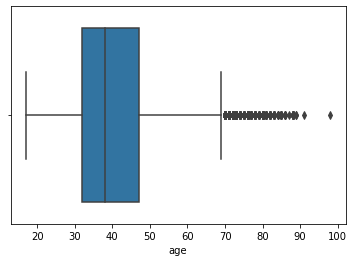

In [33]:
sns.boxplot(df['age'])   # maximum value is 98 it is possible value so no need to remove outliers

In [34]:
df.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,y,admin.,...,high.school,illiterate,professional.course,university.degree,unknown,cellular,telephone,failure,nonexistent,success
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,...,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,0.789378,0.975842,0.975842,0.717021,2.560607,962.052413,0.174719,0.112656,0.252322,...,0.230531,0.000486,0.127223,0.295478,0.042398,0.634537,0.365463,0.104067,0.862398,0.033536
std,10.403636,0.407757,0.153541,0.153541,0.719378,2.752326,187.951096,0.499025,0.316176,0.434351,...,0.421179,0.022031,0.333228,0.456264,0.201498,0.481567,0.481567,0.305352,0.344487,0.180033
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.286111,1.000000,999.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,1.000000,1.000000,1.000000,0.500000,2.000000,999.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,1.000000,1.000000,1.000000,0.886111,3.000000,999.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,13.661111,56.000000,999.000000,7.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='default', ylabel='count'>

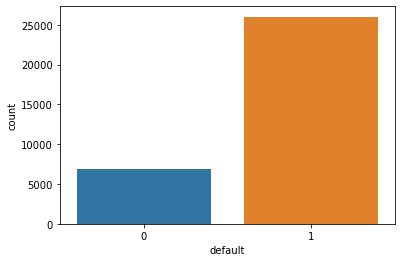

In [35]:
sns.countplot(df['default'])

<AxesSubplot:xlabel='housing', ylabel='count'>

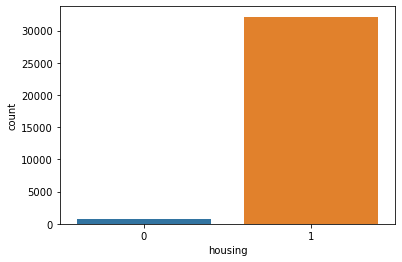

In [36]:
sns.countplot(df['housing'])

<AxesSubplot:xlabel='loan', ylabel='count'>

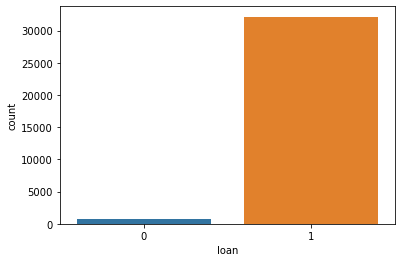

In [37]:
sns.countplot(df['loan'])

<AxesSubplot:xlabel='duration'>

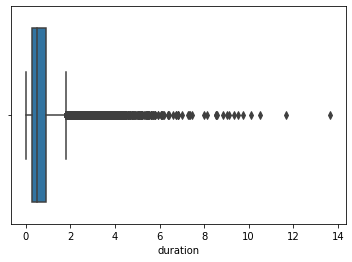

In [38]:
sns.boxplot(df['duration'])

In [39]:
iqr=df['duration'].quantile(0.75)-df['duration'].quantile(0.25)
upper_limit=df['duration'].quantile(0.75)+3*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 0.6
upper limit 2.686111111111111


In [40]:
df['duration'].loc[df['duration']>upper_limit]

2        3.188889
32       3.238889
130      3.683333
153      4.130556
173      5.152778
           ...   
32746    2.902778
32767    3.211111
32784    4.627778
32785    3.169444
32877    3.983333
Name: duration, Length: 825, dtype: float64

In [41]:
mean_dur=df['duration'].loc[df['duration']<upper_limit].mean()
mean_dur

0.6409359683438945

In [42]:
df['duration'].loc[df['duration']<upper_limit].mode()[0]

0.25

In [43]:
df['duration'].loc[df['duration']<upper_limit].median()

0.4861111111111111

In [44]:
df['duration'].describe()

count    32950.000000
mean         0.717021
std          0.719378
min          0.000000
25%          0.286111
50%          0.500000
75%          0.886111
max         13.661111
Name: duration, dtype: float64

In [45]:
df['duration']=np.cbrt(df['duration'])

In [46]:
df.loc[(df['duration']>upper_limit),'duration']=upper_limit

In [47]:
# df.info()

### campaign

<AxesSubplot:xlabel='campaign'>

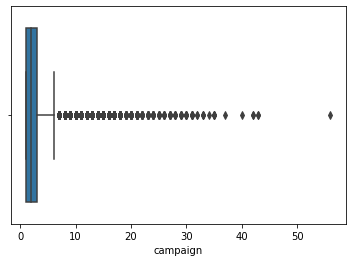

In [48]:
sns.boxplot(df['campaign'])

In [49]:
iqr=df['campaign'].quantile(0.75)-df['campaign'].quantile(0.25)
upper_limit=df['campaign'].quantile(0.75)+3*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 2.0
upper limit 9.0


In [50]:
df['campaign'].loc[df['campaign']>upper_limit]

78       13
142      12
161      10
180      10
192      19
         ..
32727    14
32756    11
32824    12
32850    14
32852    11
Name: campaign, Length: 874, dtype: int64

In [51]:
df['campaign'].describe()

count    32950.000000
mean         2.560607
std          2.752326
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [52]:
df['campaign']=np.cbrt(df['campaign'])

In [53]:
df.loc[(df['campaign']>upper_limit),'campaign']=upper_limit

<AxesSubplot:xlabel='campaign'>

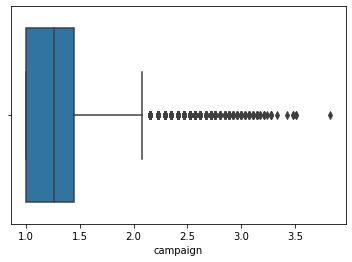

In [54]:
sns.boxplot(df['campaign'])

In [55]:
# df.info()

### pdays

<AxesSubplot:xlabel='pdays', ylabel='count'>

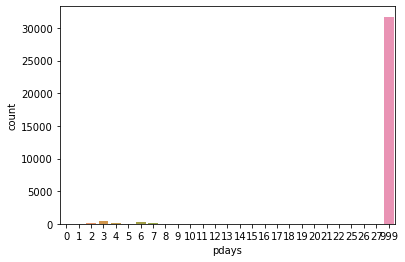

In [56]:
sns.countplot(df['pdays'])

In [57]:
df['pdays'].value_counts()

999    31724
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: pdays, dtype: int64

In [58]:
# df['pdays'].replace({'999':0},inplace=True)

In [61]:
df.loc[df["pdays"] == 999, "pdays"] = 0

In [62]:
df['pdays'].value_counts()

0     31736
3       355
6       337
4        97
2        52
7        47
9        45
10       43
12       40
5        40
13       28
1        22
15       21
11       21
14       18
8        14
16        9
17        8
18        6
22        3
19        2
21        2
27        1
25        1
20        1
26        1
Name: pdays, dtype: int64

<AxesSubplot:xlabel='pdays'>

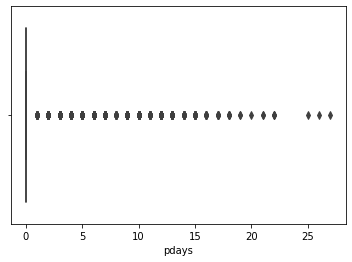

In [64]:
sns.boxplot(df['pdays'])

In [67]:
df.corr()

,age,default,housing,loan,duration,campaign,pdays,previous,y,admin.,...,high.school,illiterate,professional.course,university.degree,unknown,cellular,telephone,failure,nonexistent,success
age,1.000000,-0.169015,-0.001801,-0.001801,0.004910,0.000831,0.017594,0.020670,0.028673,-0.101707,...,-0.108766,0.013476,0.005435,-0.067329,0.062664,-0.007760,0.007760,-0.004465,-0.013084,0.032609
default,-0.169015,1.000000,0.005015,0.005015,0.015841,-0.042006,0.068918,0.106578,0.099068,0.120487,...,0.053526,-0.005507,0.050688,0.143657,-0.052735,0.137202,-0.137202,0.077569,-0.109104,0.077203
housing,-0.001801,0.005015,1.000000,1.000000,0.004116,0.001941,0.003137,-0.001950,-0.000204,0.009033,...,0.000236,0.003468,0.004312,0.007018,0.000734,0.025486,-0.025486,-0.002047,-0.002600,0.008448
loan,-0.001801,0.005015,1.000000,1.000000,0.004116,0.001941,0.003137,-0.001950,-0.000204,0.009033,...,0.000236,0.003468,0.004312,0.007018,0.000734,0.025486,-0.025486,-0.002047,-0.002600,0.008448
duration,0.004910,0.015841,0.004116,0.004116,1.000000,-0.129604,0.066804,0.044434,0.389833,-0.013190,...,0.003850,0.002444,-0.012021,-0.013267,0.003846,0.043285,-0.043285,-0.003664,-0.031314,0.066133
campaign,0.000831,-0.042006,0.001941,0.001941,-0.129604,1.000000,-0.048966,-0.085926,-0.069289,0.012540,...,-0.002793,-0.001601,0.006338,-0.002508,0.001056,-0.075142,0.075142,-0.073454,0.095419,-0.057997
pdays,0.017594,0.068918,0.003137,0.003137,0.066804,-0.048966,1.000000,0.486522,0.270453,0.020714,...,0.000549,-0.003616,0.013982,0.016675,0.029164,0.097059,-0.097059,0.033983,-0.410667,0.728159
previous,0.020670,0.106578,-0.001950,-0.001950,0.044434,-0.085926,0.486522,1.000000,0.229759,0.017416,...,0.015427,-0.004957,-0.006100,0.026650,0.022914,0.212673,-0.212673,0.680560,-0.876529,0.522921
y,0.028673,0.099068,-0.000204,-0.000204,0.389833,-0.069289,0.270453,0.229759,1.000000,0.029477,...,-0.009283,0.005218,0.000215,0.052214,0.023638,0.143238,-0.143238,0.033858,-0.195115,0.315919
admin.,-0.101707,0.120487,0.009033,0.009033,-0.013190,0.012540,0.020714,0.017416,0.029477,1.000000,...,0.121832,-0.012804,-0.160985,0.329167,-0.054961,0.058831,-0.058831,0.002011,-0.013382,0.022194


In [69]:
df.corr(method = 'kendall')

,age,default,housing,loan,duration,campaign,pdays,previous,y,admin.,...,high.school,illiterate,professional.course,university.degree,unknown,cellular,telephone,failure,nonexistent,success
age,1.000000,-0.162488,-0.002317,-0.002317,-0.000609,0.003425,0.000026,-0.013252,-0.010764,-0.078454,...,-0.088906,0.012671,0.008471,-0.058743,0.049071,-0.027303,0.027303,-0.015683,0.013483,0.000800
default,-0.162488,1.000000,0.005015,0.005015,0.014669,-0.034897,0.080654,0.109087,0.099068,0.120487,...,0.053526,-0.005507,0.050688,0.143657,-0.052735,0.137202,-0.137202,0.077569,-0.109104,0.077203
housing,-0.002317,0.005015,1.000000,1.000000,0.004869,0.000686,0.004408,0.002132,-0.000204,0.009033,...,0.000236,0.003468,0.004312,0.007018,0.000734,0.025486,-0.025486,-0.002047,-0.002600,0.008448
loan,-0.002317,0.005015,1.000000,1.000000,0.004869,0.000686,0.004408,0.002132,-0.000204,0.009033,...,0.000236,0.003468,0.004312,0.007018,0.000734,0.025486,-0.025486,-0.002047,-0.002600,0.008448
duration,-0.000609,0.014669,0.004869,0.004869,1.000000,-0.062513,0.067924,0.036117,0.284111,-0.010154,...,0.003895,-0.000066,-0.011200,-0.013316,0.004223,0.029459,-0.029459,0.000630,-0.034424,0.064801
campaign,0.003425,-0.034897,0.000686,0.000686,-0.062513,1.000000,-0.049647,-0.078193,-0.055249,0.009469,...,-0.001037,-0.000128,0.008703,-0.005734,0.000597,-0.058538,0.058538,-0.060215,0.078989,-0.049014
pdays,0.000026,0.080654,0.004408,0.004408,0.067924,-0.049647,1.000000,0.498699,0.321714,0.022071,...,-0.003237,-0.004277,0.006765,0.033643,0.026086,0.115677,-0.115677,-0.001470,-0.485837,0.932125
previous,-0.013252,0.109087,0.002132,0.002132,0.036117,-0.078193,0.498699,1.000000,0.200229,0.013903,...,0.020917,-0.004848,-0.006446,0.019481,0.015056,0.240060,-0.240060,0.834368,-0.987314,0.474030
y,-0.010764,0.099068,-0.000204,-0.000204,0.284111,-0.055249,0.321714,0.200229,1.000000,0.029477,...,-0.009283,0.005218,0.000215,0.052214,0.023638,0.143238,-0.143238,0.033858,-0.195115,0.315919
admin.,-0.078454,0.120487,0.009033,0.009033,-0.010154,0.009469,0.022071,0.013903,0.029477,1.000000,...,0.121832,-0.012804,-0.160985,0.329167,-0.054961,0.058831,-0.058831,0.002011,-0.013382,0.022194


In [70]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

ModuleNotFoundError: No module named 'sklearn'